## Introduction

### Purpose of Analysis
The variable of interest is grad_150_rate, which is the percentage of students who graduated within 150% of the normal time.

Some questions of interest are:
*  Can we accurately predict the graduation rate for given information about a school?
*  Have graduation rates changed over the years this data was collected?
*  What qualities/metrics of a school are most correlated with graduation?
*  Along with the last question, where should we target changes to improve schools and graduation rates?
*  Are there certain qualitites of the individual student that are related to higher graduation rates?

### Context of Data

These datasets come from the Chronicle of Higher Education (https://www.chronicle.com/), with support from the Bill & Melinda Gates Foundation (https://www.gatesfoundation.org/). The data was accessed on the site data world website (https://data.world/databeats/college-completion).

These datasets contain college completion data from 3,800 degree-granting institutions in the United States. The colleges included reported a first-time, full-time degree-seeking undergraduate cohort of at least 100 students at the undergraduate level in 2013, and awarded undergraduate degrees between 2011 and 2013. They also includes colleges and universities that met the same criteria in 2010.


## Importing & Exploring Data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [100]:
college = pd.read_csv('cc_institution_details.csv')
grads = pd.read_csv('cc_institution_grads.csv')

In [101]:
#inspect tables
print(college.info())
print(grads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 61 columns):
unitid                                  3798 non-null int64
chronname                               3798 non-null object
city                                    3798 non-null object
state                                   3798 non-null object
level                                   3798 non-null object
control                                 3798 non-null object
basic                                   3798 non-null object
hbcu                                    94 non-null object
flagship                                50 non-null object
long_x                                  3798 non-null float64
lat_y                                   3798 non-null float64
site                                    3779 non-null object
student_count                           3798 non-null int64
awards_per_value                        3798 non-null float64
awards_per_state_value                  37

In [102]:
college.head()
#unit id is the primary key 

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,17.2,36.4,5.6,17.2,11.1,13,386,99.7|07,NaN,882.0
1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,...,NaN,NaN,NaN,NaN,NaN,13,106,56.0|07,UAB,1376.0
2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,...,NaN,NaN,NaN,NaN,NaN,16,252,100.0|07,NaN,3.0
3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,...,0.0,0.0,0.0,0.0,0.0,13,106,43.1|07,UAH,759.0
4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,...,NaN,NaN,NaN,NaN,NaN,13,386,88.0|07,ASU,1351.0


In [103]:
grads.head()
#each row represents grad rates/class size for one school, one year, with one combo of 
#gender and race. gender=B and race=X represents the overal size and rates (all genders, all races)

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [104]:
#eliminating the '4y other' cohort type to reduce complexity
grads.cohort.value_counts()
grads = grads[(grads.cohort == '4y bach')|(grads.cohort == '2y all')]

In [105]:
#merging two csv files, college table has unique primary key
df = pd.merge(college,grads,how='left',on = 'unitid')
print(len(df))

790560


In [106]:
df[(df.unitid == 100654)&(df.year ==2011)&(df.race == 'X')]
#checking to make sure the tables merged correctly

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,...,cohort_size,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,B,X,4y bach,1088.0,116.0,345.0,10.7,31.7
1,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,M,X,4y bach,516.0,27.0,130.0,5.2,25.2
2,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,...,882.0,2011,F,X,4y bach,572.0,89.0,215.0,15.6,37.6


In [107]:
continuous = df.select_dtypes(include=['float64'])
continuous = pd.concat([continuous,df.unitid],axis=1)
len(continuous.columns)

46

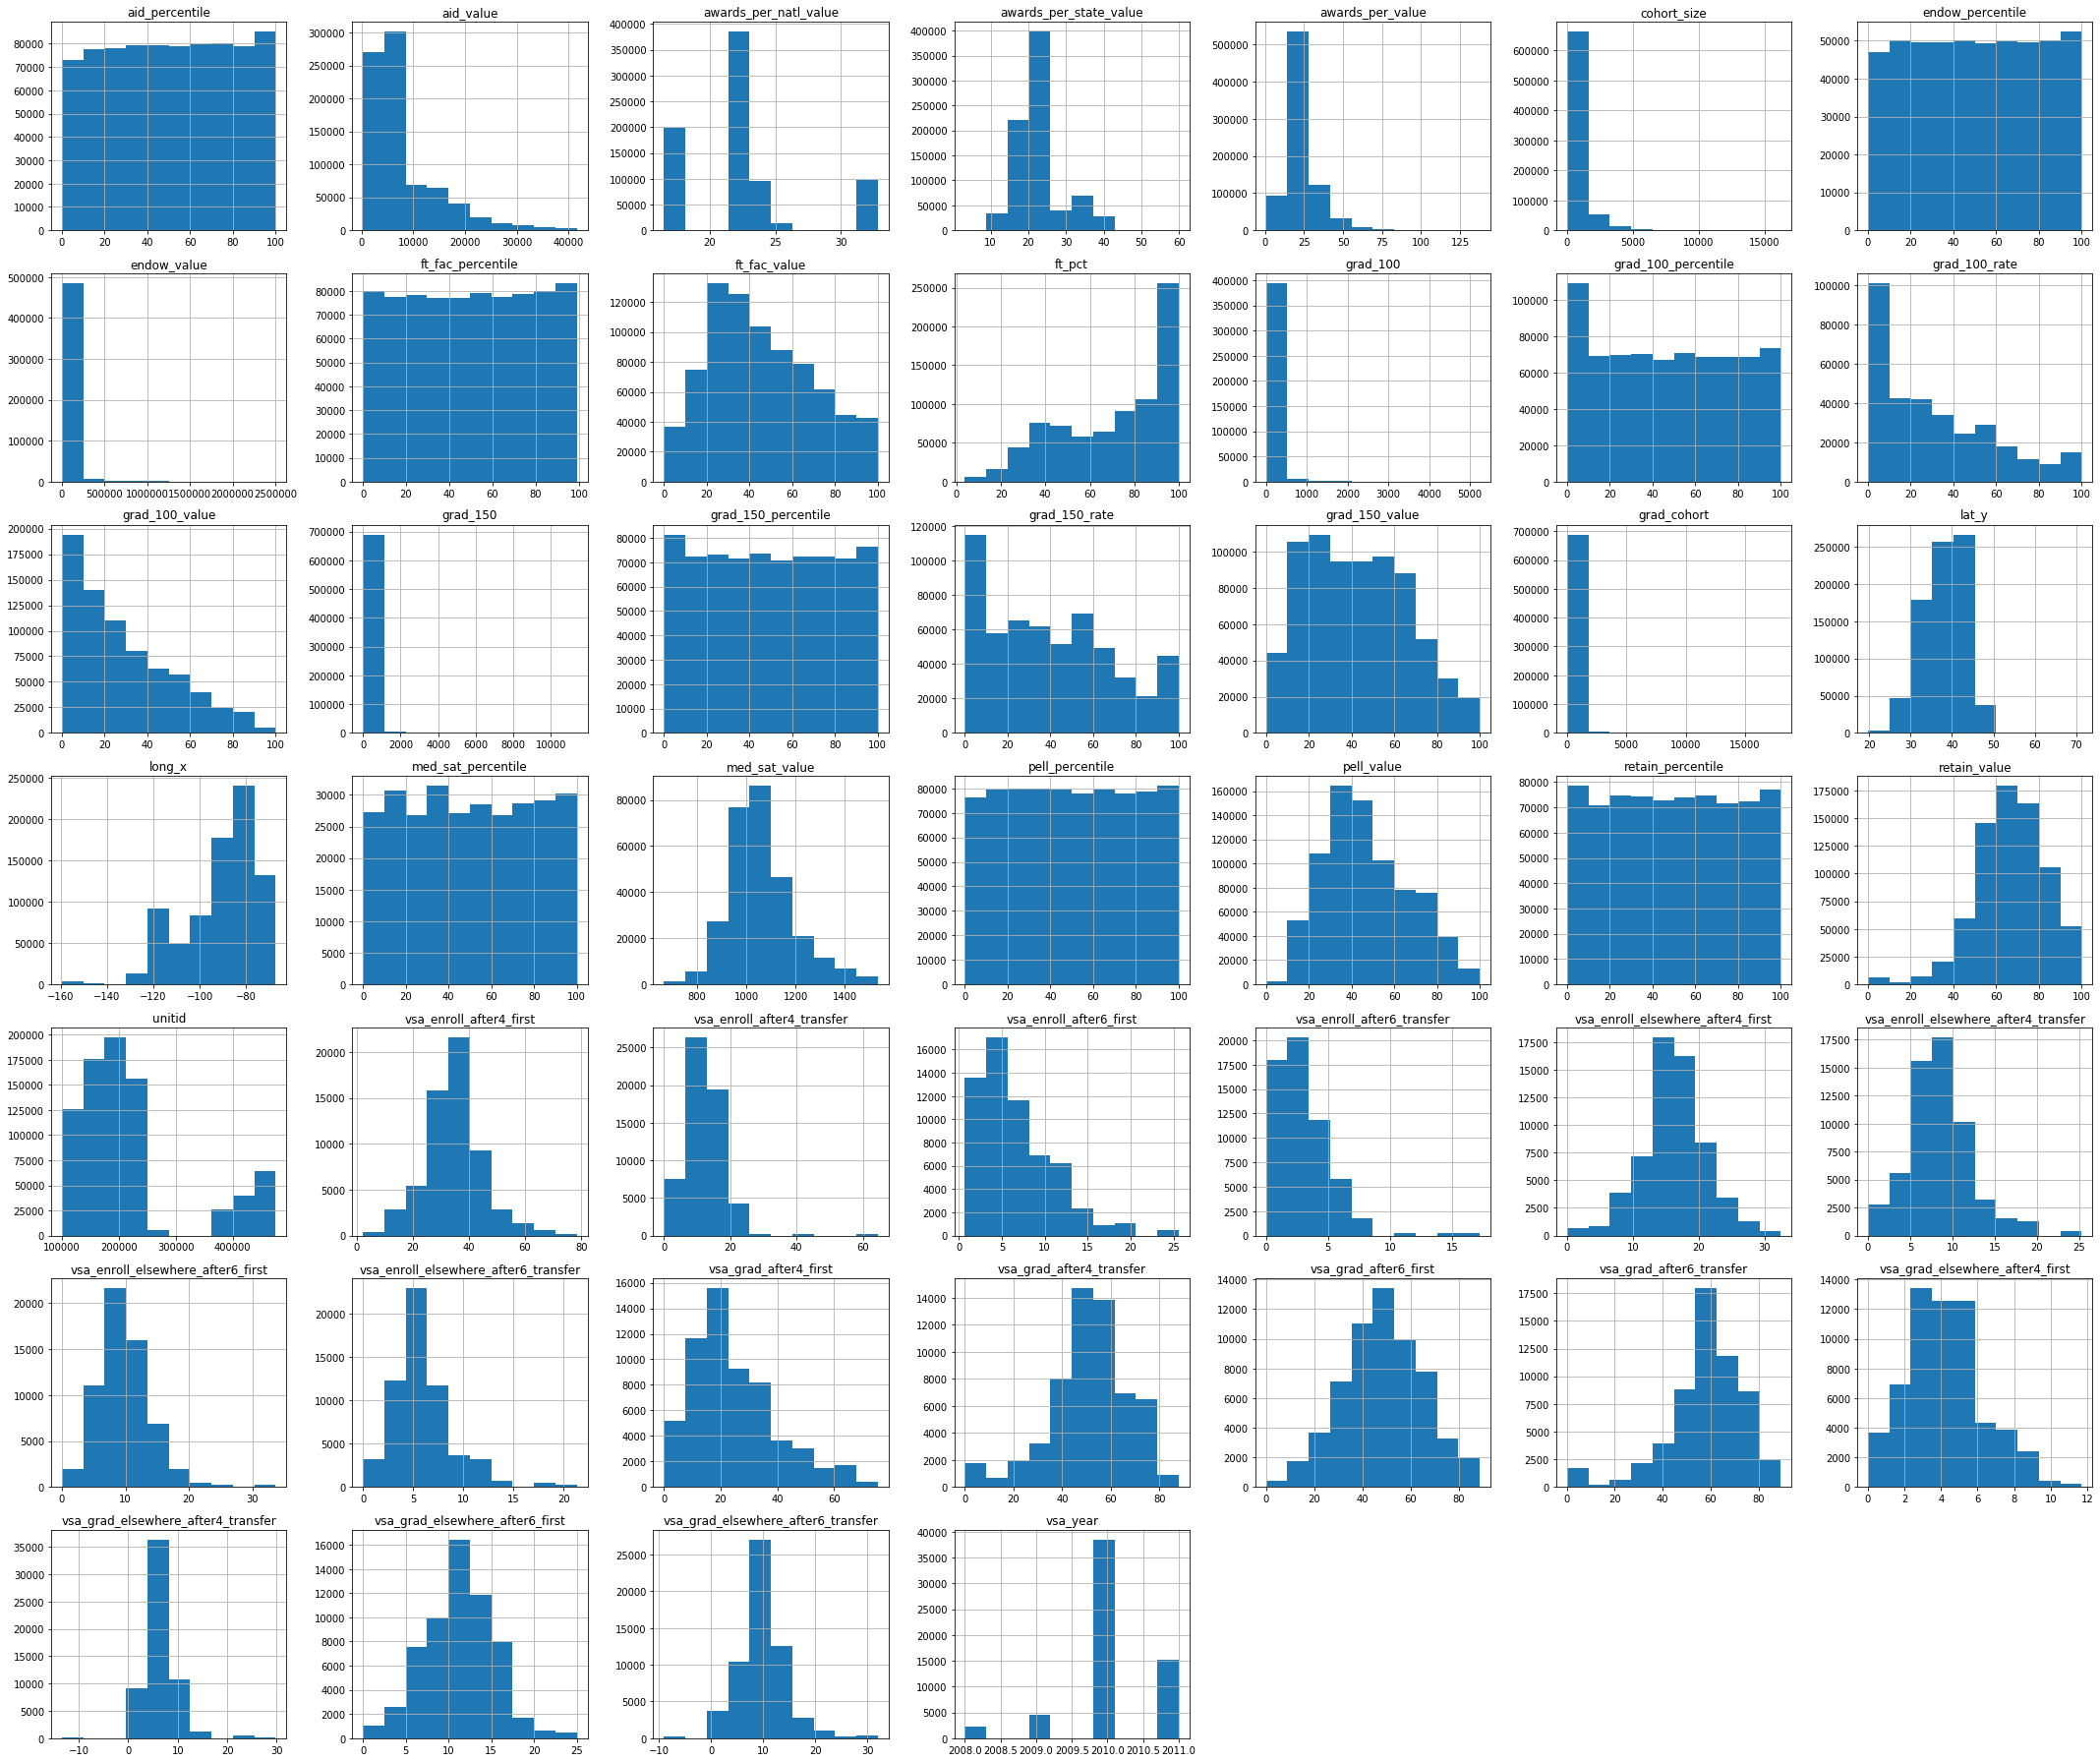

In [108]:
continuous.hist(figsize=(30,25))
plt.tight_layout();

**Observations**
*  all 'percentile' variables should have uniform distribution, but grad_100_percentile has a spike near 0
*  grad cohort looks to be highly skewed right, perhaps largest school should not be included



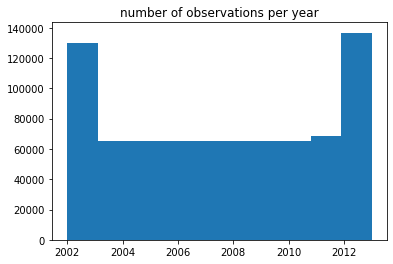

In [109]:
#was the data collected for an even amount of schools each year?
plt.hist(df.year)
plt.title('number of observations per year');

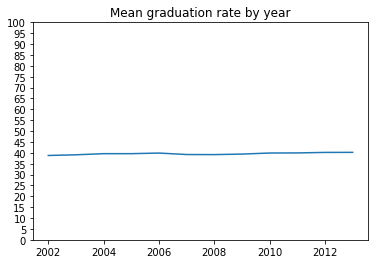

In [110]:
yearly_rates = df.groupby(by='year')['grad_150_rate'].mean()
plt.plot(yearly_rates)
plt.yticks(np.arange(0,105,5))
plt.title('Mean graduation rate by year');


### Data Cleaning

In [111]:
#checking for null values in continuous variables first
null = continuous.isna().sum()/len(df)
null[null > 0].sort_values()

aid_value                               0.000273
aid_percentile                          0.000273
pell_value                              0.000273
pell_percentile                         0.000273
ft_pct                                  0.001093
ft_fac_percentile                       0.003347
ft_fac_value                            0.003347
retain_value                            0.062022
retain_percentile                       0.062022
cohort_size                             0.069536
grad_100_value                          0.069536
grad_100_percentile                     0.069536
grad_150_value                          0.069536
grad_150_percentile                     0.069536
grad_150                                0.121790
grad_cohort                             0.121790
grad_150_rate                           0.279528
endow_value                             0.370423
endow_percentile                        0.370423
grad_100                                0.491261
grad_100_rate       

In [112]:
null[null > 0].sort_values().index

Index(['aid_value', 'aid_percentile', 'pell_value', 'pell_percentile',
       'ft_pct', 'ft_fac_percentile', 'ft_fac_value', 'retain_value',
       'retain_percentile', 'cohort_size', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'grad_150', 'grad_cohort', 'grad_150_rate', 'endow_value',
       'endow_percentile', 'grad_100', 'grad_100_rate', 'med_sat_value',
       'med_sat_percentile', 'vsa_year', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_elsewhere_after4_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_grad_after6_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_grad_after4_first',
       'vsa_enroll_after6_first', 'vsa_grad_after4_transfer',
       'vsa_grad_elsewhere_after4_transfer',
       'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer',
       'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer',
       'vsa_enroll_elsewhere_after6_transfer', '

In [113]:
#we have 1259496 rows of data, can drop rows with small amounts of nulls with little effect
continuous.dropna(subset=['aid_value', 'aid_percentile', 'pell_value', 'pell_percentile',
       'ft_pct', 'ft_fac_percentile', 'ft_fac_value', 'retain_value',
       'retain_percentile', 'cohort_size', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile'],inplace=True)

#need to drop any rows that do not have our target variable
continuous.dropna(subset= ['grad_150_rate'],inplace=True)

#if amount of nulls > 90%, drop that column 
continuous.drop(columns= ['vsa_year', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_elsewhere_after4_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_grad_after6_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_grad_after4_first',
       'vsa_enroll_after6_first', 'vsa_grad_after4_transfer',
       'vsa_grad_elsewhere_after4_transfer',
       'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer',
       'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer',
       'vsa_enroll_elsewhere_after6_transfer', 'vsa_enroll_after4_transfer'],inplace=True)


In [114]:
## re-checking for null values
null = continuous.isna().sum()/len(df)
print(null[null > 0].sort_values())


endow_value           0.194194
endow_percentile      0.194194
grad_100              0.298057
grad_100_rate         0.298057
med_sat_value         0.394255
med_sat_percentile    0.394255
dtype: float64


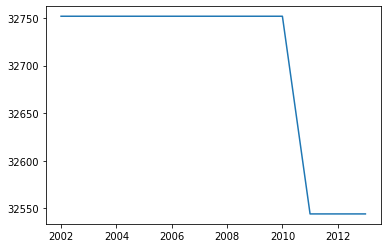

In [115]:
grouped = df.groupby(by='year',as_index=False).mean()
plt.plot(grouped.year,grouped.endow_value)
plt.show()
#no trend by year, 2012 had more data and slightly lower endow_value
#won't interpolate values

In [116]:
#looking at histograms from earlier,

#endow value is very skewed right, replace nulls with median
#endow percentile is uniformly distributed, replace nulls with 50% percentile
endow_med = continuous.endow_value.median()
continuous.endow_value.fillna(endow_med,inplace = True)
continuous.endow_percentile.fillna(50,inplace=True)

#since we are interested in grad 150, can drop grad 100 columns
continuous.drop(['grad_100','grad_100_rate'],inplace=True, axis=1)

#med_sat_value is normally distributed, replace nulls with mean
#med_sat_percentile is uniformly distributed, replace nulls with 50% percentile
continuous.med_sat_value.fillna(continuous.med_sat_value.median(),inplace=True)
continuous.med_sat_percentile.fillna(50,inplace=True)

In [117]:
continuous.describe()

,long_x,lat_y,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,...,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,cohort_size,grad_cohort,grad_150,grad_150_rate,unitid
count,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,...,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000,554995.000000
mean,-91.086630,38.355134,22.103423,21.995768,21.648878,70.979059,1058.785503,51.002088,8714.775360,53.287794,...,46.765238,67.819223,51.461411,48.172188,50.994931,811.509014,159.328715,74.525515,39.655610,201360.766329
std,15.908915,4.871822,8.921035,6.071961,4.741992,24.941184,88.500891,19.042237,6972.306361,28.141939,...,28.307460,14.821545,28.186511,23.464310,28.143649,1027.072593,383.831449,236.206147,29.667048,81261.061969
min,-159.395966,19.699720,0.500000,3.200000,16.500000,3.800000,666.000000,0.000000,294.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100654.000000
25%,-97.463479,34.736660,17.300000,18.400000,16.500000,47.800000,1050.000000,50.000000,4113.000000,30.000000,...,22.000000,57.500000,28.000000,29.300000,27.000000,226.000000,5.000000,1.000000,14.500000,151324.000000
50%,-87.216018,39.188616,20.900000,21.700000,21.500000,78.300000,1050.000000,50.000000,5722.000000,54.000000,...,45.000000,68.100000,52.000000,45.600000,51.000000,464.000000,25.000000,8.000000,36.800000,189574.000000
75%,-79.184391,41.737205,24.500000,23.700000,22.500000,93.500000,1050.000000,50.000000,11614.000000,78.000000,...,71.000000,78.600000,76.000000,65.200000,75.000000,986.000000,148.000000,52.000000,60.200000,219790.000000
max,-67.243306,71.324702,131.100000,59.900000,32.800000,100.000000,1534.000000,100.000000,41580.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,99.000000,16229.000000,18003.000000,11367.000000,100.000000,474881.000000


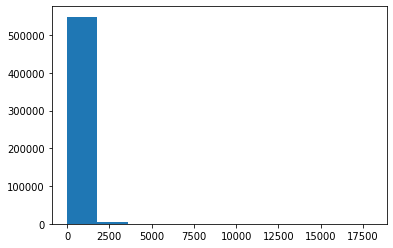

In [118]:
plt.hist(continuous.grad_cohort);

In [119]:
#cohort size and grad cohort have huge outliers
#could skew models, so drop this observation

continuous = continuous[continuous.grad_cohort < 5000]

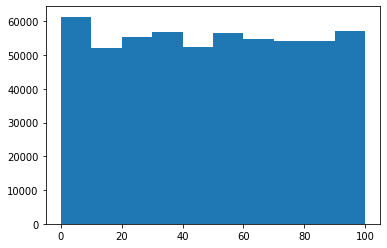

In [120]:
plt.hist(continuous.grad_100_percentile);
#this was a variable of concern when plotting all histograms
#data cleaning up to this point has made the distribution more uniform, so no action needed

In [121]:
print(df.describe().grad_150_rate)
print(continuous.describe().grad_150_rate)

#dropping null values and some additional rows did not dramatically change distribution of target variable

count    569576.000000
mean         39.612532
std          29.794769
min           0.000000
25%          14.300000
50%          36.700000
75%          60.300000
max         100.000000
Name: grad_150_rate, dtype: float64
count    554703.000000
mean         39.639662
std          29.663669
min           0.000000
25%          14.500000
50%          36.800000
75%          60.100000
max         100.000000
Name: grad_150_rate, dtype: float64


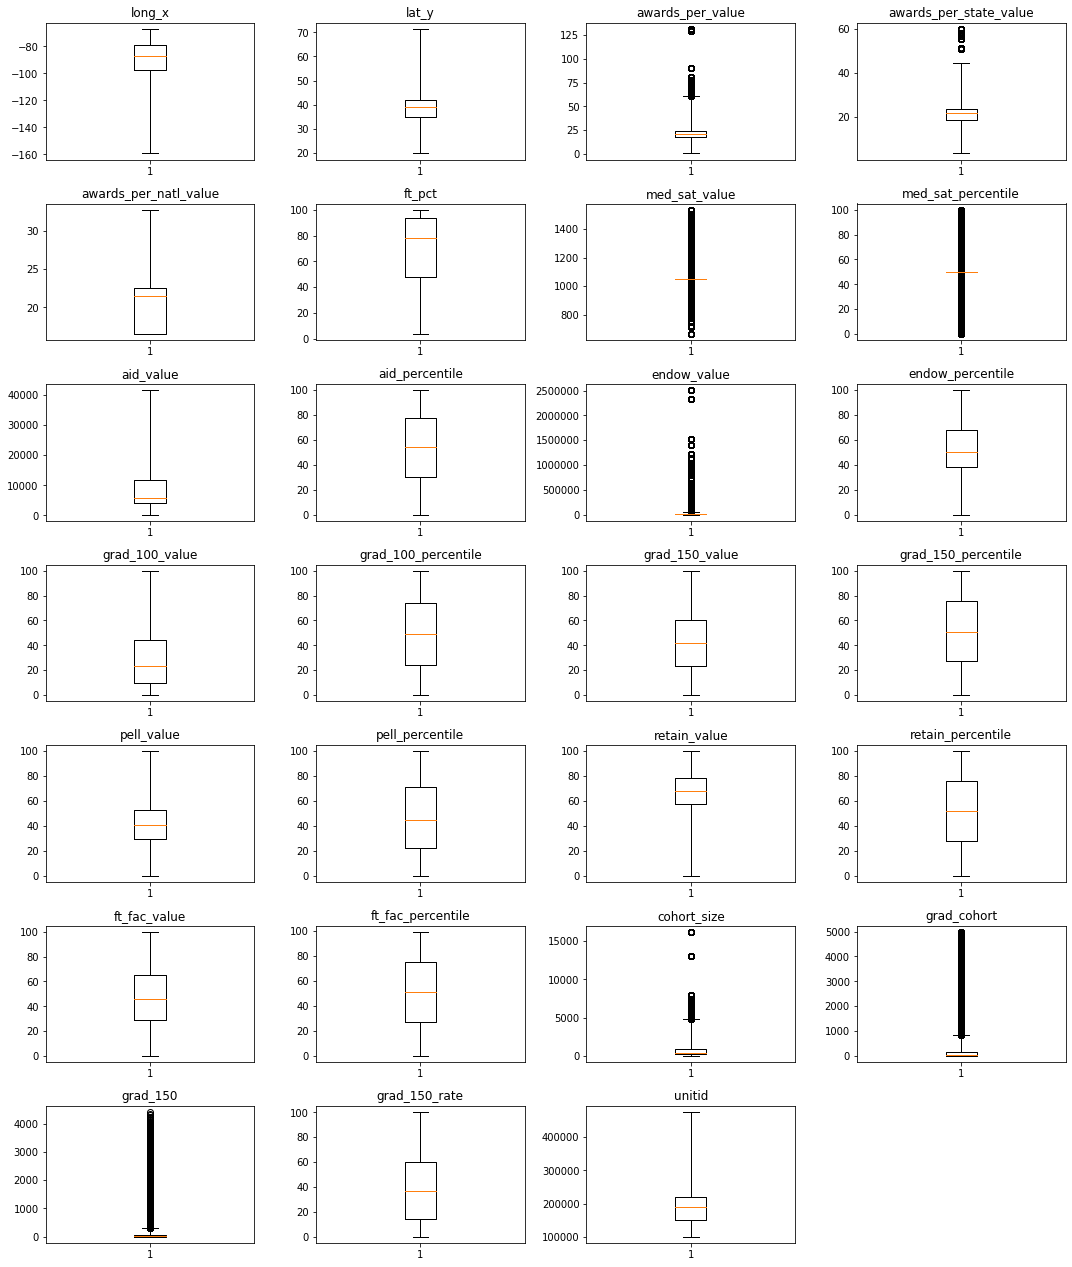

In [122]:
#looking for other outliers
continuous_labels = list(continuous.columns)

i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable to examine outliers
  plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
  plt.boxplot(continuous[var],whis=5)
  plt.title(var)
  i+=1
plt.tight_layout()
plt.show()

#some skewed distributions/outliers , might come back and winsorize later

Moving on to analysis/cleaning of categorical variables

In [123]:
cat = df.select_dtypes(include=['object','int64'])
cat = pd.concat([cat,df.unitid],axis=1)
cat.head()

,unitid,chronname,city,state,level,control,basic,hbcu,flagship,site,...,fte_percentile,state_sector_ct,carnegie_ct,counted_pct,nicknames,year,gender,race,cohort,unitid
0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,www.aamu.edu/,...,33,13,386,99.7|07,NaN,2011,B,X,4y bach,100654
1,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,www.aamu.edu/,...,33,13,386,99.7|07,NaN,2011,M,X,4y bach,100654
2,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,www.aamu.edu/,...,33,13,386,99.7|07,NaN,2011,F,X,4y bach,100654
3,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,www.aamu.edu/,...,33,13,386,99.7|07,NaN,2011,B,W,4y bach,100654
4,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,www.aamu.edu/,...,33,13,386,99.7|07,NaN,2011,M,W,4y bach,100654


In [124]:
cat.describe(include=['O'])
#hbcu and flagship have way less observations

,chronname,city,state,level,control,basic,hbcu,flagship,site,counted_pct,nicknames,gender,race,cohort
count,790560,790560,790560,790560,790560,790560,19818,10800,787266,713286,66960,790560,790560,790560
unique,3793,1787,51,2,3,33,1,1,3333,1344,274,3,6,2
top,Metro Business College,Chicago,California,4-year,Public,Associates--Private For-profit,X,X,www.itt-tech.edu,100.0|07,NSU,B,A,4y bach
freq,648,8316,71550,479466,334260,108756,19818,10800,18090,19980,1080,263520,131760,468936


In [125]:
cat.select_dtypes(include=['int64']).describe()

,unitid,student_count,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,fte_value,fte_percentile,state_sector_ct,carnegie_ct,year,unitid
count,790560.000000,790560.000000,7.905600e+05,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000
mean,219165.401981,4611.445970,6.525195e+04,61546.978347,61315.853962,49.863251,3827.494536,50.769604,34.434016,235.680943,2007.556557,219165.401981
std,98925.419975,7472.388022,1.088123e+05,33440.157310,29968.419979,28.962999,6075.265072,28.750366,28.335033,156.682232,3.467939,98925.419975
min,100654.000000,23.000000,0.000000e+00,12346.000000,24795.000000,0.000000,33.000000,0.000000,1.000000,1.000000,2002.000000,100654.000000
25%,154262.000000,631.750000,3.221600e+04,35830.000000,37780.000000,25.000000,680.000000,26.000000,14.000000,106.000000,2005.000000,154262.000000
50%,196069.500000,1879.000000,5.063400e+04,54322.000000,38763.000000,50.000000,1682.000000,51.000000,25.000000,169.000000,2008.000000,196069.500000
75%,230603.000000,5332.000000,7.723000e+04,79310.000000,101725.000000,75.000000,4302.000000,76.000000,48.000000,343.000000,2011.000000,230603.000000
max,475291.000000,170144.000000,5.282095e+06,188870.000000,101725.000000,100.000000,126411.000000,100.000000,116.000000,517.000000,2013.000000,475291.000000


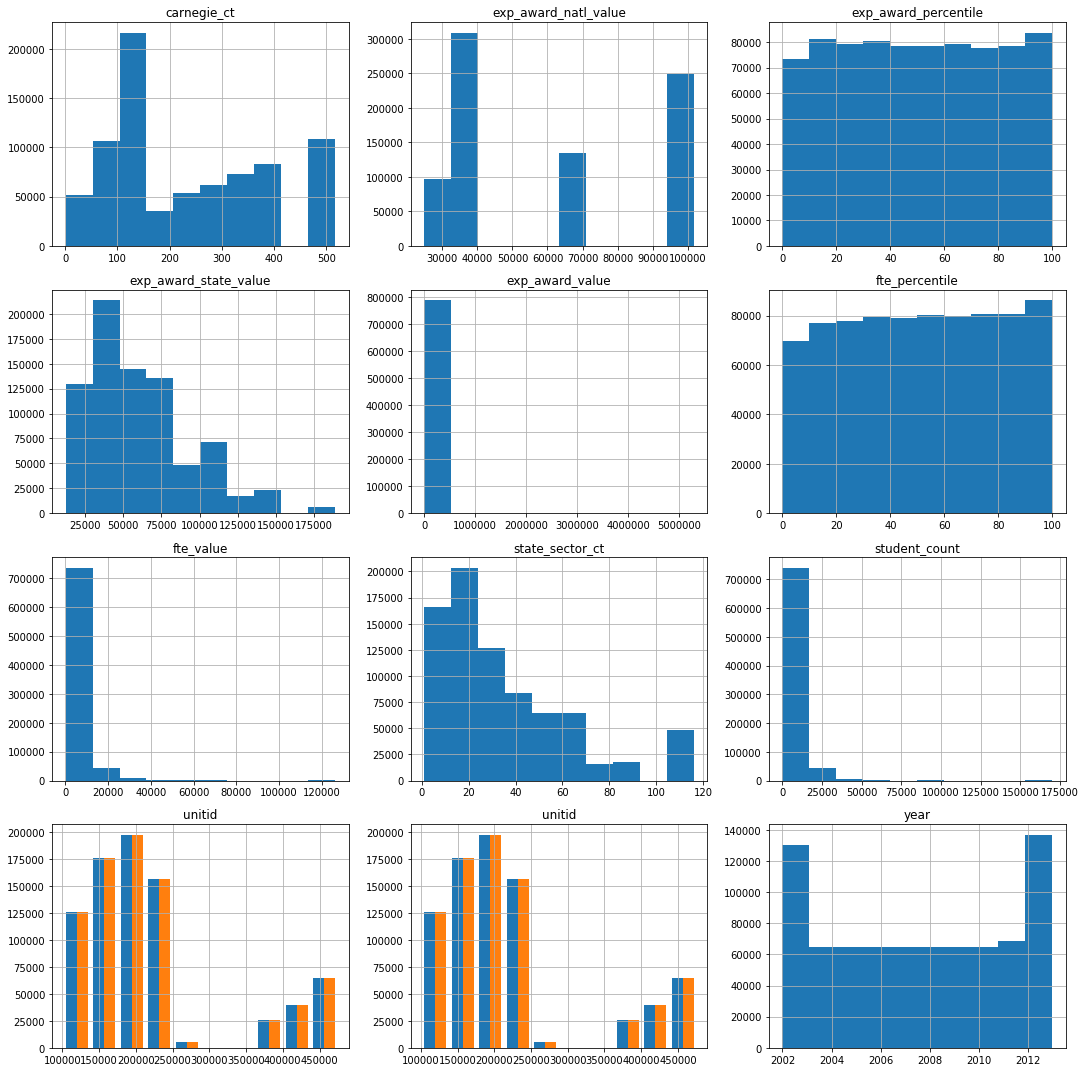

In [126]:
cat.select_dtypes(include=['int64']).hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [127]:
#reformat hbcu and flagship (has NaN when variable value is false)
df.hbcu.fillna(1,inplace=True)
df.flagship.fillna(1,inplace=True)

df.loc[df.hbcu == 'X' , 'hbcu' ] = 2
df.loc[df.flagship == 'X' , 'flagship' ] = 2

cat = df.select_dtypes(include=['object','int64'])


In [128]:
#reformatting counted_pct
split = cat.counted_pct.str.split('|',expand=True)
print(split)
cat.counted_pct = split.loc[:,0].astype('float')

           0    1
0       99.7   07
1       99.7   07
2       99.7   07
3       99.7   07
4       99.7   07
...      ...  ...
790555   NaN  NaN
790556   NaN  NaN
790557   NaN  NaN
790558   NaN  NaN
790559   NaN  NaN

[790560 rows x 2 columns]


In [129]:
#eliminate large outliers
cat = cat[cat.student_count < 50000]
cat = cat[cat.exp_award_value < 1000000]

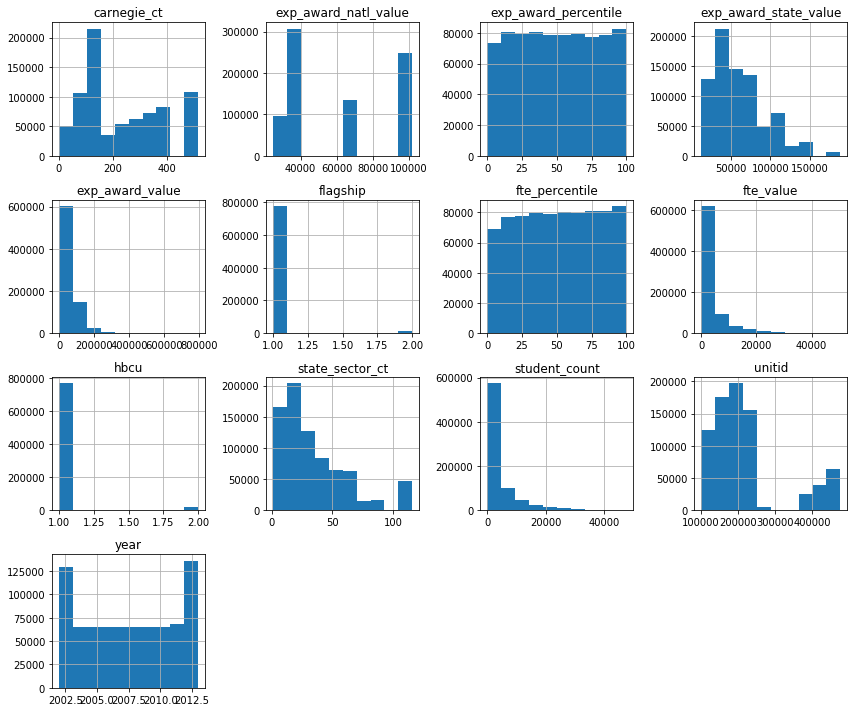

In [130]:
#check distributions again
cat.select_dtypes(include=['int64']).hist(figsize=(12,10))
plt.tight_layout()
plt.show()

In [131]:
#don't need name of univeristy or their website, or id (will use indicies to join)
cat.drop(['chronname','site','nicknames','unitid'],axis=1,inplace=True)

#drop city for now becuase it will result in too many features, but could come back and create a variable with the info (like big city or town)
cat.drop(['city'],axis=1,inplace=True)

#drop redundant values in race and gender
cat = cat[(cat.gender == 'M') | (cat.gender == 'F')]
cat = cat[cat.race != 'X']

In [132]:
null = cat.isna().sum()/len(cat)
null[null>0].sort_values()

counted_pct    0.098094
dtype: float64

In [133]:
#since this is a low percentage of rows, drop rows with nulls
cat.dropna(inplace=True)

In [134]:
print(len(cat))
print(len(continuous))
#comparing the number of observations left in each dataset
#expect merged dataset will have a row count <= 394,710

394710
554703


In [135]:
#merging the two variable types back together, only where the index of the row is the same for both datasets
df_clean = pd.merge(continuous,cat,how='inner',left_index = True,right_index=True)

In [136]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264867 entries, 4 to 790073
Data columns (total 47 columns):
long_x                    264867 non-null float64
lat_y                     264867 non-null float64
awards_per_value          264867 non-null float64
awards_per_state_value    264867 non-null float64
awards_per_natl_value     264867 non-null float64
ft_pct                    264867 non-null float64
med_sat_value             264867 non-null float64
med_sat_percentile        264867 non-null float64
aid_value                 264867 non-null float64
aid_percentile            264867 non-null float64
endow_value               264867 non-null float64
endow_percentile          264867 non-null float64
grad_100_value            264867 non-null float64
grad_100_percentile       264867 non-null float64
grad_150_value            264867 non-null float64
grad_150_percentile       264867 non-null float64
pell_value                264867 non-null float64
pell_percentile           264867 non-nu

In [137]:
df_clean.corr()

,long_x,lat_y,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,...,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,fte_value,fte_percentile,state_sector_ct,carnegie_ct,counted_pct,year
long_x,1.000000,0.131225,0.091968,0.101216,0.136082,0.196574,0.013297,-0.014436,0.170638,0.128089,...,0.086933,0.227935,0.164710,0.057016,-0.098421,-0.053337,-0.101048,0.097180,0.309988,0.000792
lat_y,0.131225,1.000000,0.092990,0.137176,0.038272,0.078730,0.082771,0.073924,0.112847,0.072284,...,0.084081,0.148737,0.087266,0.090642,-0.079984,-0.053850,-0.100321,0.030653,0.076241,-0.004699
awards_per_value,0.091968,0.092990,1.000000,0.572021,0.450451,0.257325,0.114077,0.094499,0.135032,0.126844,...,-0.110181,0.044823,0.091602,-0.252280,-0.125569,-0.087038,-0.121458,0.263038,0.179240,0.012473
awards_per_state_value,0.101216,0.137176,0.572021,1.000000,0.783841,0.505237,0.067832,0.038655,0.242083,0.167424,...,0.102267,0.135840,0.221956,-0.014356,-0.167891,-0.041739,-0.164134,0.410147,0.374990,0.028143
awards_per_natl_value,0.136082,0.038272,0.450451,0.783841,1.000000,0.630814,0.066594,0.026799,0.315430,0.120912,...,0.199626,0.296484,0.333546,0.087078,-0.157398,0.015383,-0.059027,0.483457,0.480456,0.034919
ft_pct,0.196574,0.078730,0.257325,0.505237,0.630814,1.000000,0.231132,0.190282,0.599065,0.336999,...,0.434654,0.558002,0.636429,0.181891,-0.032855,0.047196,-0.060075,0.272487,0.760192,0.005777
med_sat_value,0.013297,0.082771,0.114077,0.067832,0.066594,0.231132,1.000000,0.916584,0.490743,0.304192,...,0.458174,0.177982,0.188987,0.284606,0.210948,0.316986,0.099116,-0.134057,0.274009,-0.013161
med_sat_percentile,-0.014436,0.073924,0.094499,0.038655,0.026799,0.190282,0.916584,1.000000,0.318338,0.268435,...,0.312755,0.060037,0.070776,0.261802,0.292760,0.323272,0.028608,-0.158477,0.214432,-0.012820
aid_value,0.170638,0.112847,0.135032,0.242083,0.315430,0.599065,0.490743,0.318338,1.000000,0.529062,...,0.633222,0.670853,0.741201,0.231165,-0.127319,0.165327,0.186832,0.101235,0.592537,-0.016008
aid_percentile,0.128089,0.072284,0.126844,0.167424,0.120912,0.336999,0.304192,0.268435,0.529062,1.000000,...,0.281743,0.144568,0.089138,0.235857,0.059849,0.105700,-0.115358,0.017819,0.344629,-0.013408


In [138]:
#see which continuous variables are most heavily correlated with grad rate
df_clean.corr()['grad_150_rate'].sort_values()

pell_percentile          -0.232556
pell_value               -0.228364
hbcu                     -0.044565
student_count            -0.038764
unitid                   -0.028497
year                      0.006108
fte_value                 0.040720
lat_y                     0.063218
state_sector_ct           0.084015
cohort_size               0.089286
long_x                    0.097590
flagship                  0.102857
exp_award_percentile      0.112391
carnegie_ct               0.113212
grad_cohort               0.114097
fte_percentile            0.121975
ft_fac_percentile         0.188599
grad_150                  0.212008
awards_per_value          0.241081
aid_percentile            0.244543
endow_percentile          0.245903
endow_value               0.264066
awards_per_state_value    0.285118
exp_award_value           0.304018
med_sat_percentile        0.305426
retain_percentile         0.307614
ft_fac_value              0.322013
exp_award_state_value     0.335611
awards_per_natl_valu

### Feature Engineering

In [139]:
from scipy.stats import pearsonr

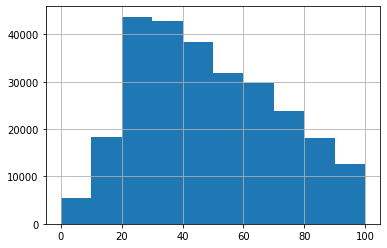

In [140]:
#want to create a variable for describing student/faculty ratio

df_clean.ft_fac_value.hist();

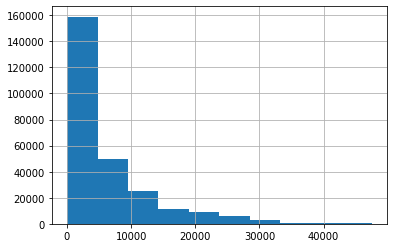

In [141]:
df_clean.student_count.hist();

In [142]:
ft_stu_percentile = df_clean.student_count.sort_values() / df_clean.student_count.max() *100

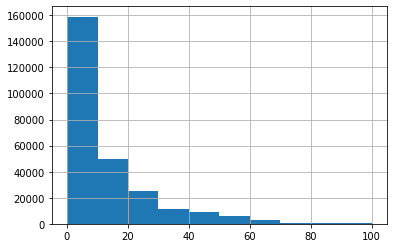

In [143]:
ft_stu_percentile.hist();

In [144]:
#have the percentile of full time faculty
#want to make it a ratio to students

stu_fac_ratio = (np.array(ft_stu_percentile)+1)/(np.array(df_clean.ft_fac_percentile)+1)
pearsonr(stu_fac_ratio,df_clean.grad_150_rate)
#not significant

(-0.04298822089233851, 1.4840021952924568e-108)

In [145]:
pearsonr(ft_stu_percentile,df_clean.grad_150_rate)
#not significant alone either


(-0.03253144366016618, 5.981988450398105e-63)

Look for any interaction variables

In [146]:
#funding might have more of an effect depending on whether a school is public or private
school_type = pd.get_dummies(df_clean.control,drop_first=True)
school_type.head()

,Private not-for-profit,Public
4,0,1
5,0,1
7,0,1
8,0,1
10,0,1


In [147]:
school_endowed = df_clean.endow_value * school_type['Private not-for-profit']
pearsonr(school_endowed,df_clean.grad_150_rate)
#endow value alone has correlation of .27 so this is not an improvement

(0.25906064399875034, 0.0)

In [148]:
school_aid = df_clean.aid_value * school_type['Private not-for-profit']
pearsonr(school_aid,df_clean.grad_150_rate)
#aid value alone has correlation of .47, so this is not an improvement

(0.4045011211306525, 0.0)

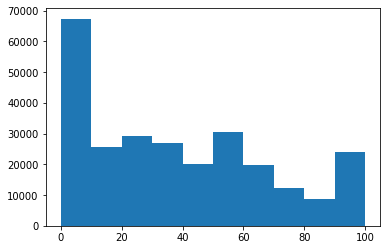

In [149]:
#one more idea: how do we treat students who transfer out of the university and graduate elsewhere?
#this data was dropped earlier due to large amnt of nulls


plt.hist(df_clean.grad_150_rate);
#why do some schools have a graduation rate so close to 0? 
#perhaps because students transfered and graduated elsewhere

In [150]:
df.vsa_grad_elsewhere_after6_transfer.describe() #swtiched to df, because in df_clean this variable was dropped

count    58320.000000
mean         9.705926
std          4.632650
min         -9.000000
25%          7.500000
50%          9.700000
75%         11.900000
max         32.000000
Name: vsa_grad_elsewhere_after6_transfer, dtype: float64

only about 10% of the schools colleted this data (there's more info in the README file on VSA reporting)

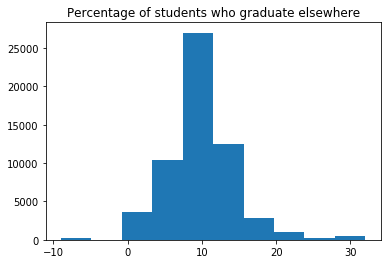

In [151]:
#visualizing distribution of this variable 
plt.hist(df.vsa_grad_elsewhere_after6_transfer)
plt.title('Percentage of students who graduate elsewhere');
#negative value needs to be dropped because a negative is not possible 

Strategy: fill in the transfer rate for colleges with NaN values with the mean value of transfer rate. Since this statistic is only collected for public schools, make a new variable for the interaction between public school type and transfer rate.

In [152]:
#dropping bad values (not null values though)
error = df.vsa_grad_elsewhere_after6_transfer[df.vsa_grad_elsewhere_after6_transfer <=0 ]
transfer = df.vsa_grad_elsewhere_after6_transfer.drop(error.index)

#concatenate vsa_grad_elsewhere_after6_transfer back in, only on indicies remaining in df_clean
df_clean = pd.concat([df_clean,transfer],axis=1,join='inner')
df_clean
#should be slightly smaller due to dropped rows with negative values

,long_x,lat_y,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,...,fte_value,fte_percentile,state_sector_ct,carnegie_ct,counted_pct,year,gender,race,cohort,vsa_grad_elsewhere_after6_transfer
4,-86.568502,34.783368,14.2,18.8,21.5,93.8,823.0,0.0,7142.0,72.0,...,3906,33,13,386,99.7,2011,M,W,4y bach,5.6
5,-86.568502,34.783368,14.2,18.8,21.5,93.8,823.0,0.0,7142.0,72.0,...,3906,33,13,386,99.7,2011,F,W,4y bach,5.6
7,-86.568502,34.783368,14.2,18.8,21.5,93.8,823.0,0.0,7142.0,72.0,...,3906,33,13,386,99.7,2011,M,B,4y bach,5.6
8,-86.568502,34.783368,14.2,18.8,21.5,93.8,823.0,0.0,7142.0,72.0,...,3906,33,13,386,99.7,2011,F,B,4y bach,5.6
10,-86.568502,34.783368,14.2,18.8,21.5,93.8,823.0,0.0,7142.0,72.0,...,3906,33,13,386,99.7,2011,M,H,4y bach,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790066,-117.568201,33.916750,12.9,12.8,16.5,23.5,1050.0,50.0,1775.0,1.0,...,4916,66,113,81,5.9,2013,M,H,2y all,NaN
790067,-117.568201,33.916750,12.9,12.8,16.5,23.5,1050.0,50.0,1775.0,1.0,...,4916,66,113,81,5.9,2013,F,H,2y all,NaN
790070,-117.568201,33.916750,12.9,12.8,16.5,23.5,1050.0,50.0,1775.0,1.0,...,4916,66,113,81,5.9,2013,F,Ai,2y all,NaN
790072,-117.568201,33.916750,12.9,12.8,16.5,23.5,1050.0,50.0,1775.0,1.0,...,4916,66,113,81,5.9,2013,M,A,2y all,NaN


In [153]:
#fillinf nulls 
df_clean.vsa_grad_elsewhere_after6_transfer.fillna(df_clean.vsa_grad_elsewhere_after6_transfer.mean(),inplace=True)

In [154]:
public = pd.get_dummies(df_clean.control,drop_first=True) #creating dummy variable for school type
public_transfer = df_clean.vsa_grad_elsewhere_after6_transfer * public.Public
pearsonr(public_transfer,df_clean.grad_150_rate)
#correlation is large enough to merit including this variable 

(-0.32995878496102926, 0.0)

In [155]:
public_transfer.name = 'public_transfer_rate'

In [156]:
#add this new variable to the dataset
df_clean = pd.concat([df_clean,public_transfer],axis=1) 

In [157]:
df_clean.isna().sum().sum()
#checking to make sure there are no nulls after manipulation and adding new variables

0

**Since no other new features came to mind after brainstorming, moving on to prepare data for modeling**

In [158]:
#standardize X values since the scaling of variables are very different
from sklearn.preprocessing import StandardScaler

#Drop all related graduation metrics from df_clean, assume we have none of those in new observations
df_clean.drop(['grad_150','grad_150_value','grad_150_percentile','grad_100_value','grad_100_percentile'],axis=1,inplace=True) 

X = pd.get_dummies(df_clean,drop_first=True) #get dummy variables for X
variables = list(X.columns)

X.drop('grad_150_rate',axis=1,inplace=True) #drop target variable from X
X = StandardScaler().fit_transform(X) #Standardize X

variables.remove('grad_150_rate')

X = pd.DataFrame(X,columns=variables)
print('number of features: ',X.shape[1])

number of features:  127


In [173]:
from sklearn.model_selection import train_test_split

Y = StandardScaler().fit_transform(pd.DataFrame(df_clean.grad_150_rate)) #standardize Y

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [160]:
#verifying X and Y are expected shape
print(Y.shape)
print(X.shape)

(263763, 1)
(263763, 127)


## Models & Tuning Parameters with Randomized Grid Search

3 types of models were trained and compared, beginning first with a decision tree model due to its built in feature selection. Then, an ensemble version of this model was built with gradient boosting in efforts to improve performance. Finally, linear regression models were built based on the feature importances from the previous two models with goals to reduce computational complexity and overfitting.

### Decision Tree

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

dtree = DecisionTreeRegressor()
#grid to choose parameters from
parameters = { 
    'max_depth' : (2,10),  
    'min_samples_split' : (2,10),
    'max_features' : (5,20)
   }
start = time.time()
search = RandomizedSearchCV(dtree,parameters,n_iter=10,cv=10,n_jobs=-1) #use randomized grid search to speed up parameter optimization
model = search.fit(X_train,y_train) #fit model to training data
print('run time:',(time.time()-start)/60,'minutes')

run time: 0.586696183681488 minutes


In [162]:
model.best_params_

{'min_samples_split': 10, 'max_features': 20, 'max_depth': 10}

In [163]:
treemodel = DecisionTreeRegressor(min_samples_split=model.best_params_['min_samples_split'], 
                                  max_features=model.best_params_['max_features'], 
                                  max_depth=model.best_params_['max_depth'])
treemodel = treemodel.fit(X_train,y_train)

importance = pd.DataFrame(treemodel.feature_importances_,X_train.columns)
features = importance.sort_values(by=0)
features.tail(15) #show 15 most important features

,0
counted_pct,0.008296
exp_award_value,0.008636
race_B,0.008721
awards_per_natl_value,0.009071
retain_percentile,0.009831
race_W,0.010706
grad_cohort,0.010880
aid_value,0.011257
pell_value,0.011400
awards_per_value,0.016801


Retain value is the share of freshmen that were retained for a second year, which has a strong relationship to the percentage of students who graduate in 6 years

In [164]:
from sklearn.model_selection import cross_val_score
train_r_1 = cross_val_score(treemodel,X_train,y_train,cv=10).mean()
test_r_1 = cross_val_score(treemodel,X_test,y_test,cv=10).mean()
print('train score:',train_r_1)
print('test score:', test_r_1)

train score: 0.3708181295645169
test score: 0.3440648826364906


Further tuning -- pruning the decision tree

In [171]:
#pruning the tree down to 10 most important features
pruned = list(features.tail(10).index)
X_pruned = X[pruned]

X_train_p , X_test_p , y_train_p, y_test_p = train_test_split(X_pruned,Y)

pruned_tree = DecisionTreeRegressor()
parameters = {  
    'min_samples_split' : (2,5),
    'max_features' : (2,10)
   }
gs = RandomizedSearchCV(pruned_tree,parameters,n_iter=10,cv=10, n_jobs=-1)

dtree = gs.fit(X_train_p,y_train_p)
print(dtree.best_params_)

{'min_samples_split': 5, 'max_features': 2}


In [174]:
pruned_tree = DecisionTreeRegressor(max_features=2)

train_r_2 = cross_val_score(pruned_tree,X_train_p,y_train_p,cv=10).mean()
test_r_2 = cross_val_score(pruned_tree,X_test_p,y_test_p,cv=10).mean()
print('train score:',train_r_2)
print('test score:', test_r_2)

#decreased performance and increased variance

train score: 0.255659153850598
test score: 0.10714617331623669


In [175]:
X_train.shape

(211010, 127)

In [176]:
y_train.shape

(211010, 1)

### Random Forest with Gradient Boosting

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

forest = GradientBoostingRegressor(max_features=3,max_depth=8) #tuned through trial and error

start = time.time()
model2 = forest.fit(X_train,y_train) #start with pruned data to save computation time
time_elapsed = time.time()-start

In [178]:
print('run time:',time_elapsed/60,'minutes')

run time: 1.5513742804527282 minutes


In [179]:
train_r_3 = cross_val_score(model2,X_train,y_train,cv=5).mean()
test_r_3 = cross_val_score(model2,X_test,y_test,cv=5).mean()
print('train score:',train_r_3)
print('test score:', test_r_3)

train score: 0.42010652315743136
test score: 0.39822368859414037


In [181]:
importance = pd.DataFrame(model2.feature_importances_,X_train.columns)
features = importance.sort_values(by=0)
features.tail(15) #show 15 most important features

,0
aid_value,0.019816
pell_percentile,0.021172
awards_per_natl_value,0.021274
endow_value,0.024978
ft_pct,0.026637
pell_value,0.028629
aid_percentile,0.028631
awards_per_value,0.028818
public_transfer_rate,0.036994
control_Public,0.039152


### OLS Linear Regression and Regularized Linear Regression Models

**Trying first with PCA**

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [183]:
#first check that there is not high multicolinearity between features since this is a requirement of PCA
correlation = X.corr()
columns = list(X.columns)
print(X.shape) #original shape

(263763, 127)


In [184]:
#attempt to start with df that is narrowed down by loan amount and keep reusing it
def cor ():
    df = correlation[(correlation['long_x']<0.80) & (correlation['long_x'] > - 0.80) & (correlation['long_x']!=1)]
    for i in columns:
        df = df[(df[i]<0.80) & (df[i] > - 0.80) | (df[i] == 1)] #keep rows for which the value is between -.8 and .8 OR the value is 1
        #otherwise, you delete every row by the end
    return df

cor() #number of rows remaining are the numer of features remaining after eliminating those with high multicolinearity

,long_x,lat_y,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,...,basic_Schools of engineering,basic_Schools of law,basic_Theological seminaries- Bible colleges- and other faith-related institutions,basic_Tribal Colleges,gender_M,race_Ai,race_B,race_H,race_W,cohort_4y bach
lat_y,0.131276,1.000000,0.093159,0.137275,0.038331,0.078987,0.082433,0.073370,0.113081,0.073203,...,0.018592,0.002741,-0.012232,0.107317,0.000452,0.022501,-0.026688,-0.008707,0.008587,0.062462
awards_per_value,0.093116,0.093159,1.000000,0.572669,0.451071,0.258740,0.113683,0.094444,0.134796,0.127745,...,-0.018824,-0.002169,0.008639,-0.044345,-0.006151,-0.034999,0.009468,-0.005898,0.042088,0.092648
awards_per_state_value,0.103482,0.137275,0.572669,1.000000,0.784134,0.505206,0.069035,0.040066,0.242200,0.166675,...,0.005178,0.007700,0.045464,-0.011233,-0.007330,-0.057579,0.018159,-0.000794,0.046046,0.305258
awards_per_natl_value,0.136561,0.038331,0.451071,0.784134,1.000000,0.631057,0.066862,0.026800,0.315751,0.120838,...,0.012859,0.004739,0.052205,-0.034202,-0.011174,-0.079185,0.030778,-0.000890,0.048529,0.490723
ft_pct,0.198401,0.078987,0.258740,0.505206,0.631057,1.000000,0.232840,0.191637,0.600449,0.336384,...,0.026806,-0.018168,0.032092,-0.021308,-0.001329,-0.031802,0.007317,0.002972,0.004250,0.732613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gender_M,-0.006783,0.000452,-0.006151,-0.007330,-0.011174,-0.001329,0.001097,0.004647,-0.014734,-0.002442,...,0.003323,-0.002813,0.020771,-0.001772,1.000000,-0.011149,0.007215,0.000281,0.004832,-0.007955
race_Ai,-0.050534,0.022501,-0.034999,-0.057579,-0.079185,-0.031802,0.028977,0.037472,-0.023725,0.007839,...,-0.003446,-0.004135,-0.027957,0.072803,-0.011149,1.000000,-0.215067,-0.205979,-0.230556,-0.026979
race_B,0.036198,-0.026688,0.009468,0.018159,0.030778,0.007317,-0.024433,-0.026920,-0.001977,-0.003787,...,-0.001256,0.000666,-0.010322,-0.025918,0.007215,-0.215067,1.000000,-0.275011,-0.307825,-0.003048
race_H,-0.005544,-0.008707,-0.005898,-0.000794,-0.000890,0.002972,0.000801,-0.000254,0.009187,0.006446,...,-0.001151,-0.003476,-0.012133,-0.025167,0.000281,-0.205979,-0.275011,1.000000,-0.294817,0.004121


In [185]:
df_no_mc = X[list(cor().index)]

deleting columns with high mutlicolinearity reduced effectiveness of model

In [186]:
#using PCA to narrow down the amount of features
pca_features = X
pca = PCA(n_components=15)
components = pca.fit_transform(pca_features) #data is already standardized

In [187]:
pca.explained_variance_ratio_

array([0.08072158, 0.05266753, 0.0264739 , 0.02528992, 0.02074312,
       0.01822168, 0.01667967, 0.01577228, 0.01325603, 0.01236564,
       0.0118853 , 0.01156186, 0.01116201, 0.01067047, 0.0103464 ])

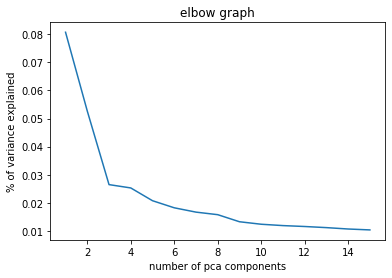

In [188]:
plt.plot(np.arange(1,16),pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.xlabel('number of pca components')
plt.title('elbow graph')
plt.show()

In [189]:
print(pca.explained_variance_ratio_.cumsum()[8])

#elbow (sharp slope change) at 8 

0.26982571499632824


In [190]:
pca_X = pd.DataFrame(components[:,:8])
pca_X

,0,1,2,3,4,5,6,7
0,0.218664,-2.498922,-2.765949,-1.959319,-4.194596,0.875837,-1.424224,-1.345916
1,0.225712,-2.506695,-2.775727,-1.952665,-4.185263,0.854355,-1.428959,-1.367164
2,0.248097,-2.119358,-3.137553,-2.109290,-4.263269,0.886977,-1.681743,-1.597490
3,0.259058,-2.083058,-3.195452,-2.125210,-4.254476,0.859864,-1.707118,-1.618959
4,0.218990,-2.446253,-2.696013,-1.784163,-4.237086,0.899765,-1.354244,-1.361691
...,...,...,...,...,...,...,...,...
263758,-3.804414,1.735720,1.598967,2.733058,2.013558,2.974122,-0.568066,2.110187
263759,-3.796760,1.734786,1.581722,2.736209,2.022807,2.951767,-0.576004,2.088905
263760,-3.852408,1.731276,1.726051,2.649469,1.965153,2.811369,-0.275848,1.954014
263761,-3.817658,1.644315,1.680101,2.685422,2.010745,2.955973,-0.532895,2.019897


In [191]:
X_train, X_test, y_train, y_test = train_test_split(pca_X,Y) 

lrm = LinearRegression().fit(X_train,y_train)

train_r_4 = cross_val_score(lrm,X_train,y_train,cv=10).mean()
test_r_4 = cross_val_score(lrm,X_test,y_test,cv=10).mean()
print('train score:',train_r_4)
print('test score:', test_r_4)

#model is not overfitting

train score: 0.3218816692918344
test score: 0.32268300663531435


**Trying OLS without PCA**

In [192]:
#use the 7 most important features determined from decision tree
columns = list(features.tail(7).index)
columns

['public_transfer_rate',
 'control_Public',
 'med_sat_percentile',
 'med_sat_value',
 'exp_award_state_value',
 'exp_award_value',
 'retain_value']

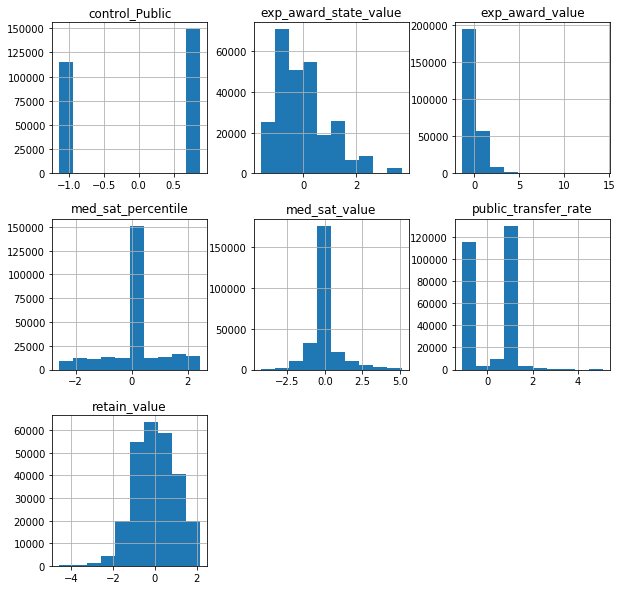

In [193]:
#look for outliers, make sure values make sense
X[columns].hist(figsize=(10,10));

In [194]:
from scipy.stats.mstats import winsorize
X_win = winsorize(X[columns],(0,.1)) #set limit on top 1% of data

In [195]:
#check for multicolinearity 
X[columns].corr()

#nothing over .8, so this is not an issue

,public_transfer_rate,control_Public,med_sat_percentile,med_sat_value,exp_award_state_value,exp_award_value,retain_value
public_transfer_rate,1.000000,0.968010,-0.043989,-0.165147,-0.517544,-0.348745,-0.276153
control_Public,0.968010,1.000000,-0.041084,-0.164643,-0.526834,-0.358445,-0.266719
med_sat_percentile,-0.043989,-0.041084,1.000000,0.916626,0.060456,0.314248,0.441135
med_sat_value,-0.165147,-0.164643,0.916626,1.000000,0.178682,0.460024,0.489522
exp_award_state_value,-0.517544,-0.526834,0.060456,0.178682,1.000000,0.480787,0.511696
exp_award_value,-0.348745,-0.358445,0.314248,0.460024,0.480787,1.000000,0.391874
retain_value,-0.276153,-0.266719,0.441135,0.489522,0.511696,0.391874,1.000000


In [197]:
X_nomc = X[['public_transfer_rate',
 'med_sat_percentile',
 'med_sat_value',
 'exp_award_state_value',
 'exp_award_value',
 'retain_value']]
X_train2, X_test2 , y_train2 , y_test2 = train_test_split(X_nomc,Y) 
#tried with winsorized data , but scores were higher with regular data

In [198]:
lrm2 = LinearRegression().fit(X_train2,y_train2)

from sklearn.model_selection import cross_val_score
train_r_5 = cross_val_score(lrm2,X_train2,y_train2,cv=10).mean()
test_r_5 = cross_val_score(lrm2,X_test2,y_test2,cv=10).mean()
print('train score:',train_r_5)
print('test score:', test_r_5)

train score: 0.28758383411475513
test score: 0.289190484393964


In [200]:
pd.DataFrame(lrm2.coef_[0],list(X_train2.columns))
#all positive relationships except the transfer rate

,0
public_transfer_rate,-0.192243
med_sat_percentile,0.045291
med_sat_value,0.109233
exp_award_state_value,0.039641
exp_award_value,0.031796
retain_value,0.313632


### Trying variations of linear regression 

OLS regression model performs slightly better with PCA components, so we will use those moving forward

In [201]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [202]:
#Ridge Regression
ridge = Ridge()
alpha = {'alpha' : np.arange(1,200,10) } #parameters  to choose from

grid = RandomizedSearchCV(ridge,alpha,cv=10,n_iter=10) #cross-validated grid search to find best parameters
rr = grid.fit(X_train,y_train) #fit to training data
print(rr.best_params_)

{'alpha': 181}


In [203]:
train_r_6 = cross_val_score(rr,X_train,y_train,cv=10).mean()
test_r_6 = cross_val_score(rr,X_test,y_test,cv=10).mean()
print('train score:',train_r_6)
print('test score:', test_r_6)

train score: 0.32188170153660667
test score: 0.32268305932527214


In [204]:
#Lasso Regression
lasso = Lasso()

grid2 = RandomizedSearchCV(lasso,alpha,cv=10,n_iter=10)
lr = grid2.fit(X_train,y_train)
print(lr.best_params_)

{'alpha': 111}


In [205]:
train_r_7 = cross_val_score(lr,X_train,y_train,cv=10).mean()
test_r_7 = cross_val_score(lr,X_test,y_test,cv=10).mean()
print('train score:',train_r_7)
print('test score:', test_r_7)

train score: 0.07324704256827816
test score: 0.11160865402865414


In [206]:
#ElasticNet Regression
enet = ElasticNet()

params = {'alpha' : np.arange(1,200,10)  , 'l1_ratio' : [0,.25,.5,.75,1] }
grid3 = RandomizedSearchCV(enet,params,cv=10,n_iter=10)
enr = grid3.fit(X_train,y_train)
print(enr.best_params_)

{'l1_ratio': 0, 'alpha': 61}


In [207]:
train_r_8 = cross_val_score(enet,X_train,y_train,cv=10).mean()
test_r_8 = cross_val_score(enet,X_test,y_test,cv=10).mean()
print('train score:',train_r_8)
print('test score:', test_r_8)

train score: 0.25245463670314044
test score: 0.2525542498060517


## Model Comparison and Selection

In [208]:
#compare accuracy, variance, run times
test = np.array([test_r_1,test_r_2,test_r_3,test_r_4,test_r_5,test_r_6,test_r_7,test_r_8])
train = np.array([train_r_1,train_r_2,train_r_3,train_r_4,train_r_5,train_r_6,train_r_7,test_r_8])
train_minus_test = train - test

scores = pd.DataFrame([train,test,train_minus_test],
                      columns=['Decision Tree','Pruned Tree','Gradient Random Forest','Linear Reg PCA','Linear Reg','Ridge','Lasso','ElasticNet'],
                      index=['train score','test score','train - test']).T
scores

,train score,test score,train - test
Decision Tree,0.370818,0.344065,0.026753
Pruned Tree,0.255659,0.107146,0.148513
Gradient Random Forest,0.420107,0.398224,0.021883
Linear Reg PCA,0.321882,0.322683,-0.000801
Linear Reg,0.287584,0.289190,-0.001607
Ridge,0.321882,0.322683,-0.000801
Lasso,0.073247,0.111609,-0.038362
ElasticNet,0.252554,0.252554,0.000000


**The Random Forest model had the highest performance on both the training and test data. The decision tree was close to the random forest with the training accuracy, but as expected, the decision tree overfit the data.**

Below is the code to get metrics on the error of the top 2 models, but it is too computationally heavy and kills the kernel each time it is run. If there was more time for this project, I would troubleshoot this issue

In [209]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# y_pred_tree = pruned_tree.fit(X_train_p,y_train).predict(X_test_p)
# error_tree = y_test - y_pred_tree

# y_pred_forest = forest.predict(X_test_p)
# error_forest = y_test - y_pred_forest

# print('decision tree MSE:', mean_squared_error(y_pred_tree,error_tree))
# print('random forest MSE:', mean_squared_error(y_pred_forest,error_forest))

In [210]:
# print('linear regression MAE:', mean_absolute_error(y_pred_tree,error_tree))
# print('ridge regression MAE:', mean_absolute_error(y_pred_forest,error_forest))

## Analysis of Results and Comparison to Other Studies

In [213]:
features.tail(10)

,0
pell_value,0.028629
aid_percentile,0.028631
awards_per_value,0.028818
public_transfer_rate,0.036994
control_Public,0.039152
med_sat_percentile,0.041213
med_sat_value,0.074583
exp_award_state_value,0.075179
exp_award_value,0.079551
retain_value,0.108023


**Most important features:**
* Freshman retention rate
* Estimated educational spending per degree (exp_award_state_value and exp_award_value)
* Median SAT value (for incoming students)



**Important missing features (from other literature):**
* Student GPA (first year)
* Transfer information for non-public 4-year institutions
* Percentage of faculty that are full time
* Faculty Salary

Having these features could increase scores for the models.

## Conclusion

The feature importances show that freshmen retention, educational spending per student, and student achievement prior to college (measured by SAT scores) are the most related to higher 6 year graduation rates. While correlation does not indicate causation, this is a meaningful lesson for colleges questioning why they have low graduation rates, and can provide data to back decisions made by universities and  2 year colleges.           

Additionally, the overall low scores of all the models are indicative of how there are likely missing features from the data, and also how challenging it is to predict graduation rates when there are so many factors (each with variation) in play.       

For further study, it would be interesting to compare the feature importances with a model that has 4 year graduation rates as a target variable. Additionally, if possible, collecting some of the "missing features" stated above would be another good next step to improve this project.

References: 

Data Accessed On: https://data.world/databeats/college-completion        
Secondary Sources: https://www.chronicle.com/       
https://www.gatesfoundation.org/        
https://www.clarion.edu/about-clarion/offices-and-administration/university-support-and-business/office-of-institutional-research/retention-and-graduation-rate-analysis-clarion-university.pdf       
https://pdfs.semanticscholar.org/64f7/064c0d0d5b3417166e6e7ca9e4e157673eb2.pdf 
